In [85]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from numpy.linalg import inv, det
np.random.seed = 42

In [86]:
def plot_gp(mu, cov, X, Y, X_train=None, Y_train=None, samples=None):
    X = X.ravel()
    Y = Y.ravel()
    mu = mu.ravel()
    fig = plt.figure(figsize=(8,6))
    # 99% confidence interval: uncertainty = Z * Standard Deviation where Z==1.96
    # http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html#:~:targetText=Strictly%20speaking%20a%2095%25%20confidence,true%20mean%20value%20(%CE%BC).
    uncertainty = 2.576 * np.sqrt(np.diag(cov))
    plt.fill_between(X, mu + uncertainty, mu - uncertainty, alpha=0.1)
    plt.plot(X, mu, label='Mean')
    plt.scatter(X, Y, label = '[Accurate] y = x*sin(x)', s=1)
    if samples is not None:
        plt.scatter(X, samples, label='Draw a sample line',s=1,c='black')
    if X_train is not None:
        plt.scatter(X_train, Y_train,label='training data')
    plt.legend()

In [87]:
def kernel(X1, X2, l=1.0, sigma_f=1.0):
    sqdist = np.sum(X1**2, 1).reshape(-1, 1) + np.sum(X2**2, 1) - 2 * np.dot(X1, X2.T)
    return sigma_f**2 * np.exp(-0.5 * sqdist / l**2)

In [88]:
# Return mu_s and cov_s, by which the Gaussian Distribution is determined.
def posterior_predictive(X_s, X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):

    K_with_noise = kernel(X_train, X_train, l, sigma_f) + sigma_y**2 * np.eye(len(X_train))
    K_s = kernel(X_train, X_s, l, sigma_f)
    K_ss = kernel(X_s, X_s, l, sigma_f)
    K_with_noise_inv = inv(K_with_noise)
    
    mu_s = (K_s.T).dot(K_with_noise_inv).dot(Y_train)
    cov_s = K_ss + 1e-8 * np.eye(len(X_s)) - (K_s.T).dot(K_with_noise_inv).dot(K_s)
    
    return mu_s, cov_s

In [89]:
def marginal_log_likelihood(X_train, Y_train, l=1.0, sigma_f=1.0, sigma_y=1e-8):
    K_with_noise = kernel(X_train, X_train, l=l, sigma_f=sigma_f) + (sigma_y**2) * np.eye(len(X_train))
    K_with_noise_inv = inv(K_with_noise)
    
    # GPML Page 19:
    # This result can also be obtained directly by observing that y = N (0, K + sigma_y**2 * I).
    mu_zero = np.zeros(X_train.shape)
    samples = np.random.multivariate_normal(mu_zero.ravel(), K_with_noise, 1)
    plt.scatter(X_train, samples, label='Draw a sample line',s=1,c='black')
    
    return -0.5 * (Y_train.T).dot(K_with_noise_inv.dot(Y_train)) - 0.5 * np.log(det(K_with_noise)) - 0.5 * len(X_train) * np.log(2*np.pi)

In [90]:
def black_box_function(x):
    return np.multiply(x,np.sin(x))

X: (1000, 1)
Y: (1000, 1)
cov: (1000, 1000)
samples: (1, 1000)


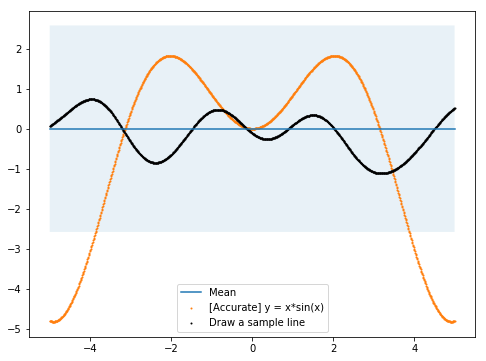

In [91]:
# Pick 1000 points on the function in domain [-5,5)

X = np.arange(-5, 5, 0.01).reshape(-1, 1)
print("X:",X.shape)

Y = black_box_function(X)
print("Y:",Y.shape)

# Mean and covariance of the prior
mu = np.zeros(X.shape)
cov = kernel(X, X)
print("cov:",cov.shape)

# Draw samples from the prior
samples = np.random.multivariate_normal(mu.ravel(), cov, 1)
print("samples:",samples.shape)

# Plot GP mean, confidence interval and samples 
plot_gp(mu, cov, X, Y, X_train=None, Y_train=None, samples=samples)

In [92]:
# Training data with noise
sigma_noise = 0
mu_noise = 0

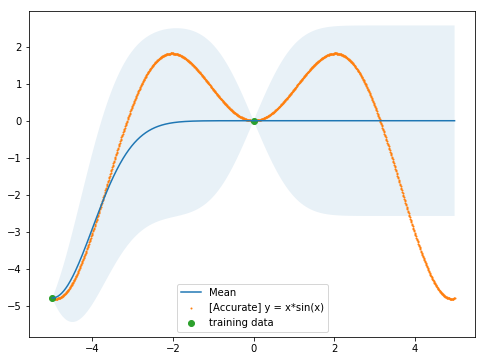

In [93]:
X_train = np.arange(-5, 5, 5).reshape(-1, 1)
noise = sigma_noise * np.random.randn(*X_train.shape) + mu_noise
Y_train = np.multiply(X_train,np.sin(X_train)) + noise

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=sigma_noise)

plot_gp(mu_s, cov_s, X, Y, X_train=X_train, Y_train=Y_train, samples=None)

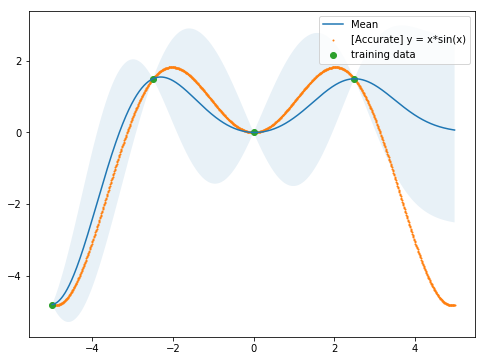

In [94]:
X_train = np.arange(-5, 5, 2.5).reshape(-1, 1)
noise = sigma_noise * np.random.randn(*X_train.shape) + mu_noise
Y_train = np.multiply(X_train,np.sin(X_train)) + noise

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=sigma_noise)
sq
plot_gp(mu_s, cov_s, X, Y, X_train=X_train, Y_train=Y_train, samples=None)

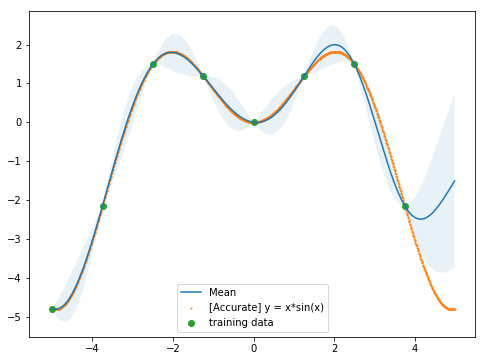

In [95]:
X_train = np.arange(-5, 5, 1.25).reshape(-1, 1)
noise = sigma_noise * np.random.randn(*X_train.shape) + mu_noise
Y_train = np.multiply(X_train,np.sin(X_train)) + noise

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=sigma_noise)

plot_gp(mu_s, cov_s, X, Y, X_train=X_train, Y_train=Y_train, samples=None)

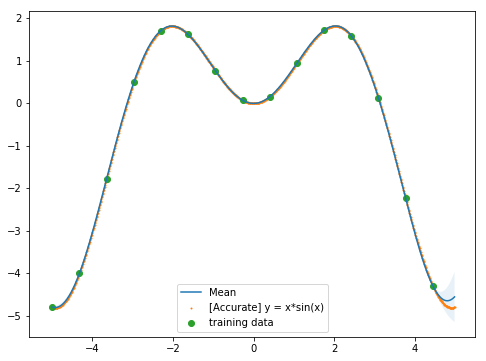

In [96]:
X_train = np.arange(-5, 5, 0.675).reshape(-1, 1)
noise = sigma_noise * np.random.randn(*X_train.shape) + mu_noise
Y_train = np.multiply(X_train,np.sin(X_train)) + noise

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=sigma_noise)

plot_gp(mu_s, cov_s, X, Y, X_train=X_train, Y_train=Y_train, samples=None)

/Users/luojinqi/anaconda/envs/ztdl/lib/python3.6/site-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in sqrt
  


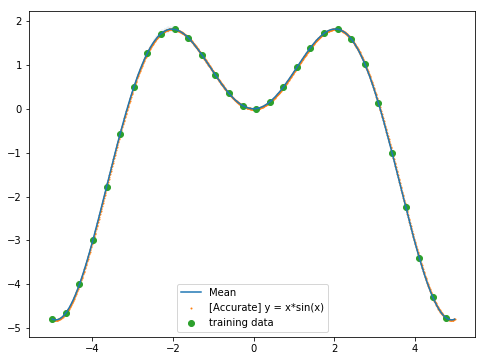

In [97]:
X_train = np.arange(-5, 5, 0.3375).reshape(-1, 1)
noise = sigma_noise * np.random.randn(*X_train.shape) + mu_noise
Y_train = np.multiply(X_train,np.sin(X_train)) + noise

# Compute mean and covariance of the posterior predictive distribution
mu_s, cov_s = posterior_predictive(X, X_train, Y_train, sigma_y=sigma_noise)

plot_gp(mu_s, cov_s, X, Y, X_train=X_train, Y_train=Y_train, samples=None)

(1, 1)


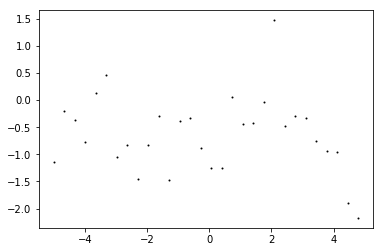

In [83]:
mlh = marginal_log_likelihood(X_train, Y_train, sigma_y=sigma_noise)
print(mlh.shape)

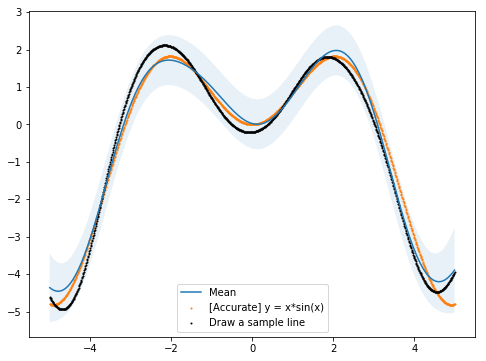

In [84]:
samples = np.random.multivariate_normal(mu_s.ravel(), cov_s, 1)
plot_gp(mu_s, cov_s, X, Y, X_train=None, Y_train=None, samples=samples)

Reference:
http://www.cs.cornell.edu/courses/cs4780/2018fa/lectures/lecturenote15.html

http://sphweb.bumc.bu.edu/otlt/MPH-Modules/BS/BS704_Confidence_Intervals/BS704_Confidence_Intervals_print.html#:~:targetText=Strictly%20speaking%20a%2095%25%20confidence,true%20mean%20value%20(%CE%BC).
 
http://krasserm.github.io/2018/03/19/gaussian-processes/

https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.scatter.html

https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.random.randn.html

and my YTB video list :)